In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM

In [6]:
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/Auge_AGN_stacking_info_update2.fits') as hdul:
    data = hdul[1].data
    cols = hdul[1].data


In [21]:
def flux_to_lum(f,z):
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
    dist = cosmo.luminosity_distance(z).value *3.086E24
    
    L = 4*np.pi*f*dist**2
    return L
    

In [22]:
F24 = data['F24']
z = data['spec_z']
ID = data['ID']
field = data['field']

s82x_F24 = F24[field == 'S82X']*1E-6 # Flux in Jy
s82x_z = z[field == 'S82X']
s82x_ID = ID[field == 'S82X']
s82x_field = field[field == 'S82X']

c = const.c.to('cm/s').value

In [25]:
Fnu24 = s82x_F24*1E-23
wave = 22 # microns
# wave = 24
wave_cm = wave*1E-4
freq = c/wave_cm

nuFnu = Fnu24*freq

L = flux_to_lum(nuFnu,s82x_z)/(1+s82x_z)

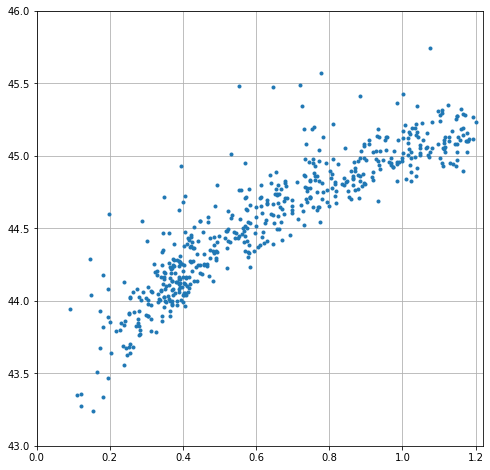

In [26]:
plt.figure(figsize=(8,8),facecolor='w')
plt.plot(s82x_z,np.log10(L),'.')
plt.grid()
plt.xlim(0,1.22)
plt.ylim(43,46)
plt.show()

In [29]:
print(s82x_F24)
print(len(s82x_F24[s82x_F24 == 0.0026]))

[0.0040516  0.0034704  0.00810637 0.00247074 0.00349322 0.00229312
 0.002645   0.00965447 0.00748548 0.00357153 0.00262317 0.0028604
 0.00273343 0.00273669 0.00238701 0.00257529 0.00315374 0.00401076
 0.00293512 0.00386568 0.00496248 0.00206455 0.01680595 0.00454178
 0.00320056 0.00390505 0.00341923 0.00395573 0.00354835 0.0043614
 0.00328115 0.00374481 0.00340115 0.00401815 0.01736442 0.0026
 0.00450844 0.0046949  0.00291358 0.0040778  0.0076309  0.00526776
 0.00544034 0.00441801 0.00351582 0.00381264 0.00383744 0.00266456
 0.00353856 0.0058768  0.0040778  0.00451259 0.0026     0.00257766
 0.00364776 0.00516607 0.00273922 0.00340115 0.00401445 0.01170084
 0.00363435 0.00258004 0.00446703 0.00411553 0.0018708  0.00510536
 0.0026     0.00205886 0.00254933 0.0026     0.00474708 0.00340429
 0.00208558 0.0026     0.00483494 0.00415362 0.01597995 0.00298144
 0.00347397 0.00367135 0.00231008 0.00215986 0.00207982 0.00264257
 0.00228048 0.00208942 0.00451675 0.00323315 0.00251667 0.00312195
 